In [4]:
#mask tidal forcing
import xarray as xr
import os
import sys
import matplotlib.pyplot as plt
import scipy.spatial as spatial
import numpy as np

src_path = os.path.join(os.environ.get('projdir'),'src')
sys.path.append(src_path)
# import my functions
from features.log_progress import log_progress
from features.grid_ttide import NDinterp

pott_path = os.path.join(os.environ.get('rawdir'),'gdata','waom10_data','waom10_tds_2007_hack.nc')
pott_ds = xr.open_dataset(pott_path)
grid_path =  os.path.join(os.environ.get('rawdir'),'waom10_tidal_mask','Data','waom10','waom10_grd_large.nc')
grid = xr.open_dataset(grid_path)

### create list of additives to get neibours

In [65]:
r=3
neibours_add = []
for n_xi in np.arange(0,r+1):
    for n_eta in np.arange(0,r+1):
        if (n_xi**2 + n_eta**2) <= r**2:
            neibours_add.append([n_xi,n_eta])
            if n_xi > 0:
                neibours_add.append([-n_xi,n_eta])
            if n_eta > 0:
                neibours_add.append([n_xi,-n_eta])
            if n_xi > 0 and n_eta > 0:
                neibours_add.append([-n_xi,-n_eta])
            
neibours_add        

[(0, 0),
 (0, 1),
 [0, -1],
 (0, 2),
 [0, -2],
 (0, 3),
 [0, -3],
 (1, 0),
 [-1, 0],
 (1, 1),
 [-1, 1],
 [1, -1],
 [-1, -1],
 (1, 2),
 [-1, 2],
 [1, -2],
 [-1, -2],
 (2, 0),
 [-2, 0],
 (2, 1),
 [-2, 1],
 [2, -1],
 [-2, -1],
 (2, 2),
 [-2, 2],
 [2, -2],
 [-2, -2],
 (3, 0),
 [-3, 0]]

### stack mask_rho to single coordinate

In [19]:
mask_rho_stacked = grid.mask_rho.stack(xieta=('xi_rho','eta_rho'))

In [55]:
mask_rho_stacked.sel(xieta=[(0,0),(200,200)])

<xarray.DataArray 'mask_rho' (xieta: 2)>
array([ 1.,  1.])
Coordinates:
  * xieta    (xieta) MultiIndex
  - xi_rho   (xieta) int64 0 200
  - eta_rho  (xieta) int64 0 200
Attributes:
    long_name:      mask on RHO-points
    flag_values:    [ 0.  1.]
    flag_meanings:  land water

### for single cell, create neibours list and loop up if any mask_rho_stack of this list is 0

In [78]:
xi = 200
eta = 200
neibours = np.add(neibours_add,(xi,eta))
new=[]
for ind,neib in enumerate(neibours):
    new.append(tuple(neib))
neibours = new
neibours

[(200, 200),
 (200, 201),
 (200, 199),
 (200, 202),
 (200, 198),
 (200, 203),
 (200, 197),
 (201, 200),
 (199, 200),
 (201, 201),
 (199, 201),
 (201, 199),
 (199, 199),
 (201, 202),
 (199, 202),
 (201, 198),
 (199, 198),
 (202, 200),
 (198, 200),
 (202, 201),
 (198, 201),
 (202, 199),
 (198, 199),
 (202, 202),
 (198, 202),
 (202, 198),
 (198, 198),
 (203, 200),
 (197, 200)]

In [85]:
(mask_rho_stacked.sel(xieta=neibours)==1).any()

<xarray.DataArray 'mask_rho' ()>
array(True, dtype=bool)

In [63]:
x,y = np.mgrid[0:grid.xi_rho.size,0:grid.eta_rho.size]
points = np.column_stack((x.flatten(),y.flatten()))
tree = spatial.KDTree(points)

In [108]:
xi,eta = 859,729

In [109]:

neib = []
for n_xi in np.arange(0,r+1):
    for n_eta in np.arange(0,r+1):
        if (n_xi**2 + n_eta**2) > r**2:
            break
        else:
            if (xi-n_xi >= 0) and (eta-n_eta >= 0):
                neib.append([xi-n_xi,eta-n_eta])
            elif (xi+n_xi <= grid.xi_rho[-1]) and (eta+n_eta <= grid.eta_rho[-1]):
                neib.append([xi+n_xi,eta+n_eta])
neib

[[859, 729],
 [859, 728],
 [859, 727],
 [859, 726],
 [859, 725],
 [859, 724],
 [859, 723],
 [859, 722],
 [859, 721],
 [859, 720],
 [859, 719],
 [859, 718],
 [859, 717],
 [859, 716],
 [859, 715],
 [859, 714],
 [859, 713],
 [859, 712],
 [859, 711],
 [859, 710],
 [859, 709],
 [859, 708],
 [859, 707],
 [859, 706],
 [859, 705],
 [859, 704],
 [858, 729],
 [858, 728],
 [858, 727],
 [858, 726],
 [858, 725],
 [858, 724],
 [858, 723],
 [858, 722],
 [858, 721],
 [858, 720],
 [858, 719],
 [858, 718],
 [858, 717],
 [858, 716],
 [858, 715],
 [858, 714],
 [858, 713],
 [858, 712],
 [858, 711],
 [858, 710],
 [858, 709],
 [858, 708],
 [858, 707],
 [858, 706],
 [858, 705],
 [857, 729],
 [857, 728],
 [857, 727],
 [857, 726],
 [857, 725],
 [857, 724],
 [857, 723],
 [857, 722],
 [857, 721],
 [857, 720],
 [857, 719],
 [857, 718],
 [857, 717],
 [857, 716],
 [857, 715],
 [857, 714],
 [857, 713],
 [857, 712],
 [857, 711],
 [857, 710],
 [857, 709],
 [857, 708],
 [857, 707],
 [857, 706],
 [857, 705],
 [856, 729],

In [ ]:
grid

In [135]:
%%writefile ../src/features/mask_radius.py
import xarray as xr
from .log_progress import log_progress
import numpy as np

def get_neibours(xi,eta,r,grid):
    neibours = []
    r=int(r/2)
    for n_xi in np.arange(0,r+1):
        for n_eta in np.arange(0,r+1):
            if (n_xi**2 + n_eta**2) > r**2:
                break
            else:
                if (xi-n_xi >= 0) and (eta-n_eta >= 0):
                    neibours.append([xi-n_xi,eta-n_eta])
                elif (xi+n_xi <= grid.xi_rho[-1]) and (eta+n_eta <= grid.eta_rho[-1]):
                    neibours.append([xi+n_xi,eta+n_eta])
    return neibours

def mask_radius(mask_da,r):
    mask_new = mask_da.copy()
    for xi in log_progress(mask_da.xi_rho.values,name='xi'):
        for eta in mask_da.eta_rho.values:
            if mask_da.isel(eta_rho=eta,xi_rho=xi) != 0:
                neibours = get_neibours(xi,eta,r,mask_da)
                for neib in neibours:
                    if mask_da.isel(xi_rho=neib[0],eta_rho=neib[1]).values == 0:
                        mask_new[eta,xi]=0
                        break
    return mask_new

Overwriting ../src/features/mask_radius.py


In [132]:
tide_mask = mask_radius(grid.mask_rho,10)

VBox(children=(HTML(value=''), IntProgress(value=0, max=70)))

<IPython.core.display.Javascript object>


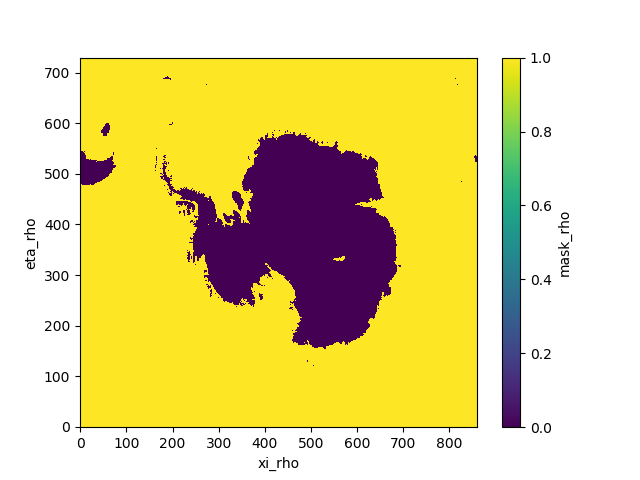

In [133]:
%matplotlib notebook
plt.close()
tide_mask.plot()
plt.show()

In [50]:
mask_tide[0,0]

TypeError: 'method' object is not subscriptable

0 0
0 1
0 2
1 0
1 1
2 0
